In [1]:
%cd "../.."

/home/id1897/projet-statistique-2022/projet-statistique-2022


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import euclidean_distances
import scipy.spatial as sp

from gensim import models


from reduction_dim.correlation_matrix import *
from doc_embedding.moyenne import word_emb_vers_doc_emb_moyenne

## CBOW

### Matrice distance avant reduction

In [3]:
#fichier sous la forme d'un dataframe
cbow_model = models.KeyedVectors.load_word2vec_format('data/tunning/cbow.kv')
data = pd.DataFrame(cbow_model.vectors,index=cbow_model.index_to_key)

with open("data/docs.json") as file:
    docs = json.load(file)
moy_embedding_tfidf = word_emb_vers_doc_emb_moyenne(docs=docs, modele=cbow_model, methode = 'TF-IDF')

moy_embedding_tfidf = np.array(moy_embedding_tfidf)

initial_distance = euclidean_distances(moy_embedding_tfidf)

### Matrice après réduction TSNE

In [4]:
data=pd.DataFrame(moy_embedding_tfidf)
X = data.values

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [15]:
mod_tsne=[]
divergence=[]
for index, p in enumerate([50,75,100,125,150,200]):
    tsne = TSNE(n_components = 2, perplexity=p, n_iter=2000, random_state=0)
    tsne_results = tsne.fit_transform(X_scaled)
    tsne_distance = euclidean_distances(tsne_results)
    mod_tsne.append(tsne_distance)  
    divergence.append(tsne.kl_divergence_)

/home/id1897/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/id1897/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/id1897/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/id1897/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/id1897/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/id1897/.local/lib/python3.9/site-packages/sklearn/

In [11]:
#mod_tsne=[]
#for index, p in enumerate([10, 25, 75]):
#    for index1, n in enumerate([1000, 1500, 2000]):
#        for index2, l in enumerate([100, 500, 1000]):
#            tsne = TSNE(n_components = 2, perplexity=p, n_iter=n, random_state=0, learning_rate=l)
#            tsne_results = tsne.fit_transform(X_scaled)
#            tsne_distance = euclidean_distances(tsne_results)
#            mod_tsne.append(tsne_distance)  


/home/id1897/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/id1897/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/id1897/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/id1897/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/id1897/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/id1897/.local/lib/python3.9/site-packages/sk

### Correlation

In [12]:
correlation=[]
for i in range(len(mod_tsne)):
    c=correlation_epsilon(initial_distance=initial_distance,new_distance=mod_tsne[i],epsilon=np.inf)
    correlation.append(c)

correlation 
correlation.index(max(correlation))
#correlation max pour p=75, n=2000, l=100

[0.6179079967533118,
 0.6217684082956626,
 0.6688999308335667,
 0.6331546364831953,
 0.6375700347464582,
 0.6773699367882947,
 0.6446822265382944,
 0.646480607257353,
 0.6827340942900406,
 0.6891440765889933,
 0.7134056729577205,
 0.7028743048297786,
 0.713228493233137,
 0.7200784460786273,
 0.7116688380716547,
 0.7182440637593773,
 0.7253364598862851,
 0.7137821110444005,
 0.7394841168964663,
 0.746577566097931,
 0.7475788089467091,
 0.7491547107581575,
 0.7480626908018545,
 0.7481878252364559,
 0.7495956174234851,
 0.7485699946072091,
 0.7488613756070827]

In [16]:
correlation_proche=[]
for i in range(len(mod_tsne)):
    c=correlation_epsilon(initial_distance=initial_distance,new_distance=mod_tsne[i],epsilon=0.5)
    correlation_proche.append(c)

correlation_proche
correlation_proche.index(max(correlation_proche))
#max pour le même modèle

24

### Etude hyperparamètres

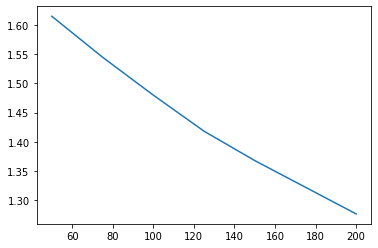

In [16]:
#L'algorithme t-SNE consiste à faire concorder les deux densités de probabilité,
#en minimisant la divergence de Kullback-Leibler entre les deux distributions
#Minimiser la KL Divergence revient à réduire l'erreur de notre représentation
#Etude de la divergence en fonction de la perplexité
x = np.array([50,75,100,125,150,200])
plt.plot(x, divergence)
plt.show()

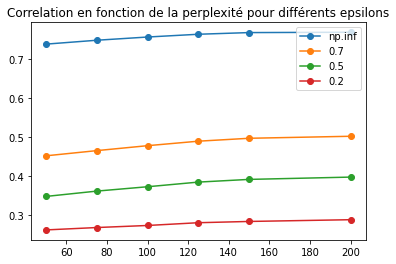

In [17]:
#Etude de la perplexité et de epsilon
x = np.array([50,75,100,125,150,200])
correlation=[]
correlation1=[]
correlation2=[]
correlation3=[]
for i in range(len(mod_tsne)):
    c=correlation_epsilon(initial_distance=initial_distance,new_distance=mod_tsne[i],epsilon=np.inf)
    c1=correlation_epsilon(initial_distance=initial_distance,new_distance=mod_tsne[i],epsilon=0.7)
    c2=correlation_epsilon(initial_distance=initial_distance,new_distance=mod_tsne[i],epsilon=0.5)
    c3=correlation_epsilon(initial_distance=initial_distance,new_distance=mod_tsne[i],epsilon=0.2)
    correlation.append(c)
    correlation1.append(c1)
    correlation2.append(c2)
    correlation3.append(c3)

plt.plot(x, correlation, "o-",label="np.inf")
plt.plot(x, correlation1, "o-",label="0.7")
plt.plot(x, correlation2,"o-", label= "0.5")
plt.plot(x, correlation3,"o-",label="0.2")
plt.legend()
plt.title("Correlation en fonction de la perplexité pour différents epsilons")

plt.show()

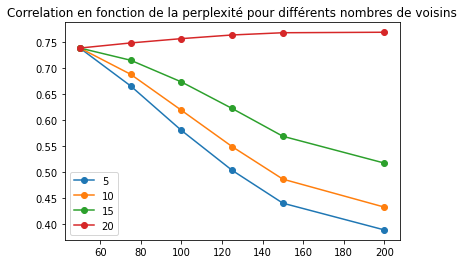

In [18]:
#Etude de la perplexité et du nb de voisins
x = np.array([50,75,100,125,150,200])
correlation=[]
correlation1=[]
correlation2=[]
correlation3=[]
for i in range(len(mod_tsne)):
    c=correlation_neighboor(initial_distance=initial_distance,new_distance=mod_tsne[i],k=5)
    c1=correlation_neighboor(initial_distance=initial_distance,new_distance=mod_tsne[i],k=10)
    c2=correlation_neighboor(initial_distance=initial_distance,new_distance=mod_tsne[i],k=15)
    c3=correlation_neighboor(initial_distance=initial_distance,new_distance=mod_tsne[i],k=20)
    correlation.append(c)
    correlation1.append(c1)
    correlation2.append(c2)
    correlation3.append(c3)

plt.plot(x, correlation, "o-",label="5")
plt.plot(x, correlation1, "o-",label="10")
plt.plot(x, correlation2,"o-", label= "15")
plt.plot(x, correlation3,"o-",label="20")
plt.legend()
plt.title("Correlation en fonction de la perplexité pour différents nombres de voisins")

plt.show()

## GLOVE

In [19]:
glove_model = models.KeyedVectors.load_word2vec_format('data/tunning/glove.kv')
data = pd.DataFrame(glove_model.vectors,index=glove_model.index_to_key)

with open("data/docs.json") as file:
    docs = json.load(file)
moy_embedding_tfidf = word_emb_vers_doc_emb_moyenne(docs=docs, modele=glove_model, methode = 'TF-IDF')

data=pd.DataFrame(moy_embedding_tfidf)
X = data.values

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

### Tests

In [23]:
mod_tsne_glove=[]
for index, p in enumerate([10, 25, 75]):
    for index1, n in enumerate([1000, 1500, 2000]):
        for index2, l in enumerate([100, 500, 1000]):
            tsne = TSNE(n_components = 2, perplexity=p, n_iter=n, random_state=0, learning_rate=l)
            tsne_results = tsne.fit_transform(X_scaled)
            tsne_distance = euclidean_distances(tsne_results)
            mod_tsne_glove.append(tsne_distance)  

/home/id1897/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/id1897/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/id1897/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/id1897/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/id1897/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/id1897/.local/lib/python3.9/site-packages/sk

In [28]:
correlation_glove=[]
for i in range(len(mod_tsne)):
    c=correlation_epsilon(initial_distance=initial_distance,new_distance=mod_tsne_glove[i],epsilon=np.inf)
    correlation_glove.append(c)

max(correlation_glove)

0.1719502949064246

In [29]:
correlation_proche_glove=[]
for i in range(len(mod_tsne)):
    c=correlation_epsilon(initial_distance=initial_distance,new_distance=mod_tsne_glove[i],epsilon=0.5)
    correlation_proche_glove.append(c)

correlation_proche_glove  

[0.06810449790026152,
 0.06940357037602558,
 0.06369861980527249,
 0.06832043726962957,
 0.06980439088998514,
 0.06549383784679425,
 0.06714906566614666,
 0.06967461987313772,
 0.06650588391357948,
 0.07535974160393091,
 0.07281325013074934,
 0.06591556966834472,
 0.07460575749626497,
 0.0723226544832951,
 0.06616433583265936,
 0.07244361443956708,
 0.07251241517771928,
 0.06640912042233939,
 0.07199703065426788,
 0.06354128179170829,
 0.06560214271640202,
 0.07139782544216901,
 0.06313757385439318,
 0.06558032745617512,
 0.07027426972321421,
 0.06343029561147251,
 0.06577030629758956]

### Etude

In [20]:
mod_tsne_glove=[]
divergence_glove=[]
for index, p in enumerate([50,75,100,125,150,200]):
    tsne = TSNE(n_components = 2, perplexity=p, n_iter=2000, random_state=0)
    tsne_results = tsne.fit_transform(X_scaled)
    tsne_distance = euclidean_distances(tsne_results)
    mod_tsne_glove.append(tsne_distance)  
    divergence_glove.append(tsne.kl_divergence_)

/home/id1897/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/id1897/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/id1897/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/id1897/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/id1897/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/id1897/.local/lib/python3.9/site-packages/sklearn/

### Etude hyperparamètres

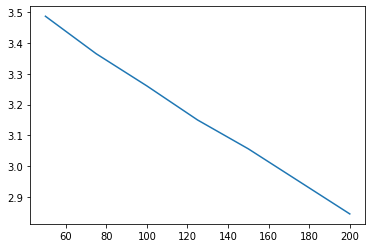

In [21]:
#Etude de la divergence en fonction de la perplexité
x = np.array([50,75,100,125,150,200])
plt.plot(x, divergence_glove)
plt.show()

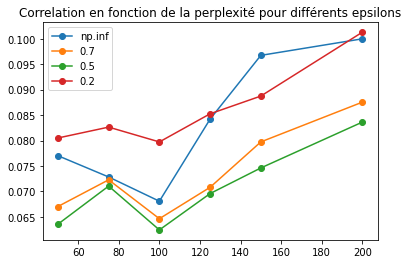

In [22]:
#Etude de la perplexité et de epsilon
x = np.array([50,75,100,125,150,200])
correlation=[]
correlation1=[]
correlation2=[]
correlation3=[]
for i in range(len(mod_tsne)):
    c=correlation_epsilon(initial_distance=initial_distance,new_distance=mod_tsne_glove[i],epsilon=np.inf)
    c1=correlation_epsilon(initial_distance=initial_distance,new_distance=mod_tsne_glove[i],epsilon=0.7)
    c2=correlation_epsilon(initial_distance=initial_distance,new_distance=mod_tsne_glove[i],epsilon=0.5)
    c3=correlation_epsilon(initial_distance=initial_distance,new_distance=mod_tsne_glove[i],epsilon=0.2)
    correlation.append(c)
    correlation1.append(c1)
    correlation2.append(c2)
    correlation3.append(c3)

plt.plot(x, correlation, "o-",label="np.inf")
plt.plot(x, correlation1, "o-",label="0.7")
plt.plot(x, correlation2,"o-", label= "0.5")
plt.plot(x, correlation3,"o-",label="0.2")
plt.legend()
plt.title("Correlation en fonction de la perplexité pour différents epsilons")

plt.show()

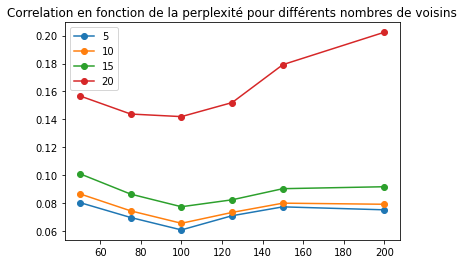

In [23]:
#Etude de la perplexité et du nb de voisins
x = np.array([50,75,100,125,150,200])
correlation=[]
correlation1=[]
correlation2=[]
correlation3=[]
for i in range(len(mod_tsne)):
    c=correlation_neighboor(initial_distance=initial_distance,new_distance=mod_tsne_glove[i],k=5)
    c1=correlation_neighboor(initial_distance=initial_distance,new_distance=mod_tsne_glove[i],k=10)
    c2=correlation_neighboor(initial_distance=initial_distance,new_distance=mod_tsne_glove[i],k=15)
    c3=correlation_neighboor(initial_distance=initial_distance,new_distance=mod_tsne_glove[i],k=20)
    correlation.append(c)
    correlation1.append(c1)
    correlation2.append(c2)
    correlation3.append(c3)

plt.plot(x, correlation, "o-",label="5")
plt.plot(x, correlation1, "o-",label="10")
plt.plot(x, correlation2,"o-", label= "15")
plt.plot(x, correlation3,"o-",label="20")
plt.legend()
plt.title("Correlation en fonction de la perplexité pour différents nombres de voisins")

plt.show()

## SKIPGRAM

In [24]:
skipgram_model = models.KeyedVectors.load_word2vec_format('data/tunning/skipgram.kv')
data = pd.DataFrame(skipgram_model.vectors,index=skipgram_model.index_to_key)

with open("data/docs.json") as file:
    docs = json.load(file)
moy_embedding_tfidf = word_emb_vers_doc_emb_moyenne(docs=docs, modele=skipgram_model, methode = 'TF-IDF')

data=pd.DataFrame(moy_embedding_tfidf)
X = data.values

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

### Tests

In [31]:
mod_tsne_skipgram=[]
for index, p in enumerate([10, 25, 75]):
    for index1, n in enumerate([1000, 1500, 2000]):
        for index2, l in enumerate([100, 500, 1000]):
            tsne = TSNE(n_components = 2, perplexity=p, n_iter=n, random_state=0, learning_rate=l)
            tsne_results = tsne.fit_transform(X_scaled)
            tsne_distance = euclidean_distances(tsne_results)
            mod_tsne_skipgram.append(tsne_distance)  

/home/id1897/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/id1897/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/id1897/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/id1897/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/id1897/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/id1897/.local/lib/python3.9/site-packages/sk

In [ ]:
correlation_skipgram=[]
for i in range(len(mod_tsne)):
    c=correlation_epsilon(initial_distance=initial_distance,new_distance=mod_tsne_skipgram[i],epsilon=np.inf)
    correlation_skipgram.append(c)

correlation_skipgram

In [ ]:
correlation_proche_skipgram=[]
for i in range(len(mod_tsne)):
    c=correlation_epsilon(initial_distance=initial_distance,new_distance=mod_tsne_skipgram[i],epsilon=0.5)
    correlation_proche_skipgram.append(c)

correlation_proche_skipgram

### Etude

In [25]:
mod_tsne_skipgram=[]
divergence_skipgram=[]
for index, p in enumerate([50,75,100,125,150,200]):
    tsne = TSNE(n_components = 2, perplexity=p, n_iter=2000, random_state=0)
    tsne_results = tsne.fit_transform(X_scaled)
    tsne_distance = euclidean_distances(tsne_results)
    mod_tsne_skipgram.append(tsne_distance)  
    divergence_skipgram.append(tsne.kl_divergence_)

/home/id1897/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/id1897/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


### Etude hyperparamètres

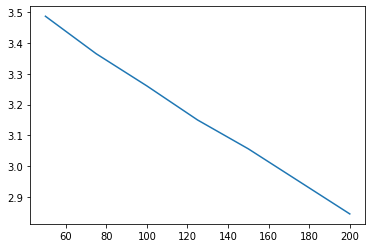

In [21]:
#Etude de la divergence en fonction de la perplexité
x = np.array([50,75,100,125,150,200])
plt.plot(x, divergence_skipgram)
plt.show()

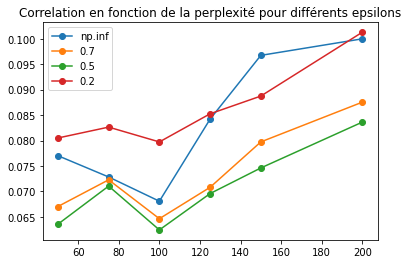

In [22]:
#Etude de la perplexité et de epsilon
x = np.array([50,75,100,125,150,200])
correlation=[]
correlation1=[]
correlation2=[]
correlation3=[]
for i in range(len(mod_tsne)):
    c=correlation_epsilon(initial_distance=initial_distance,new_distance=mod_tsne_skipgram[i],epsilon=np.inf)
    c1=correlation_epsilon(initial_distance=initial_distance,new_distance=mod_tsne_skipgram[i],epsilon=0.7)
    c2=correlation_epsilon(initial_distance=initial_distance,new_distance=mod_tsne_skipgram[i],epsilon=0.5)
    c3=correlation_epsilon(initial_distance=initial_distance,new_distance=mod_tsne_skipgram[i],epsilon=0.2)
    correlation.append(c)
    correlation1.append(c1)
    correlation2.append(c2)
    correlation3.append(c3)

plt.plot(x, correlation, "o-",label="np.inf")
plt.plot(x, correlation1, "o-",label="0.7")
plt.plot(x, correlation2,"o-", label= "0.5")
plt.plot(x, correlation3,"o-",label="0.2")
plt.legend()
plt.title("Correlation en fonction de la perplexité pour différents epsilons")

plt.show()

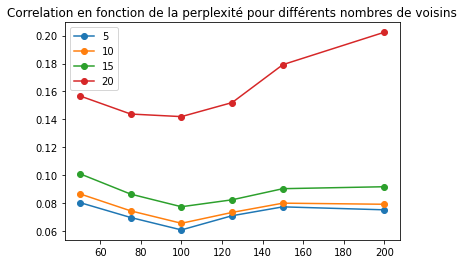

In [23]:
#Etude de la perplexité et du nb de voisins
x = np.array([50,75,100,125,150,200])
correlation=[]
correlation1=[]
correlation2=[]
correlation3=[]
for i in range(len(mod_tsne)):
    c=correlation_neighboor(initial_distance=initial_distance,new_distance=mod_tsne_skipgram[i],k=5)
    c1=correlation_neighboor(initial_distance=initial_distance,new_distance=mod_tsne_skipgram[i],k=10)
    c2=correlation_neighboor(initial_distance=initial_distance,new_distance=mod_tsne_skipgram[i],k=15)
    c3=correlation_neighboor(initial_distance=initial_distance,new_distance=mod_tsne_skipgram[i],k=20)
    correlation.append(c)
    correlation1.append(c1)
    correlation2.append(c2)
    correlation3.append(c3)

plt.plot(x, correlation, "o-",label="5")
plt.plot(x, correlation1, "o-",label="10")
plt.plot(x, correlation2,"o-", label= "15")
plt.plot(x, correlation3,"o-",label="20")
plt.legend()
plt.title("Correlation en fonction de la perplexité pour différents nombres de voisins")

plt.show()